 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize

    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [3]:
mymean = 100

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [4]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


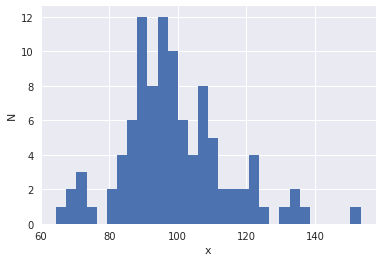

In [5]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.04, standard deviation: 15.34


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [7]:
# mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
mysize = np.random.choice(range(2000), 100, replace=False)
print (sort(mysize), mysize.shape)

[   5    6   89   92  128  187  199  210  242  272  302  368  389  394  414
  443  449  461  475  493  495  515  578  591  592  606  618  636  645  670
  743  755  793  814  820  834  839  841  852  862  878  950  967  968  979
  988 1010 1028 1032 1033 1036 1041 1087 1106 1111 1126 1157 1166 1184 1192
 1204 1226 1257 1279 1281 1325 1344 1400 1402 1419 1436 1483 1489 1569 1597
 1606 1624 1634 1655 1664 1677 1685 1721 1728 1740 1741 1745 1794 1805 1846
 1855 1865 1885 1890 1921 1955 1962 1982 1989 1992] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


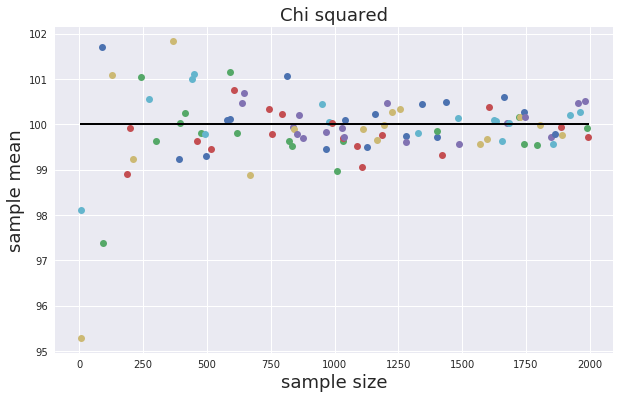

In [8]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0.5,1,'Chisquare Sample Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


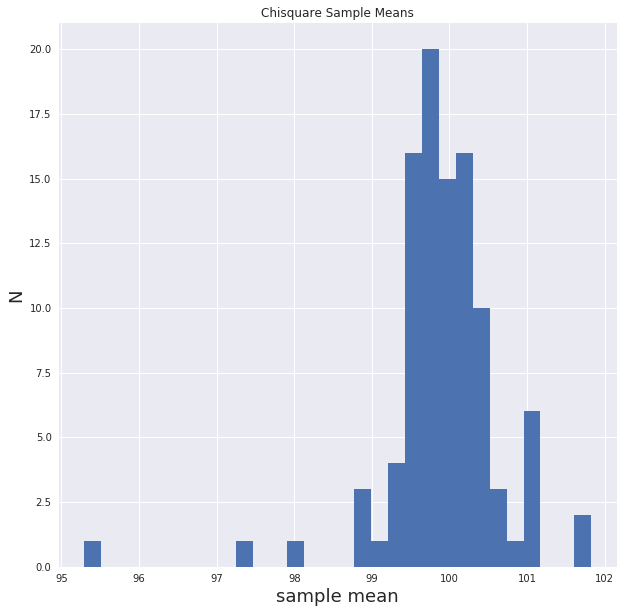

In [9]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Chisquare Sample Means')

## Figure 3: The histogram of 100 ChiSquare Distribution Sample Means

# Do it for the Normal distribution


In [ ]:
# np.random.normal?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


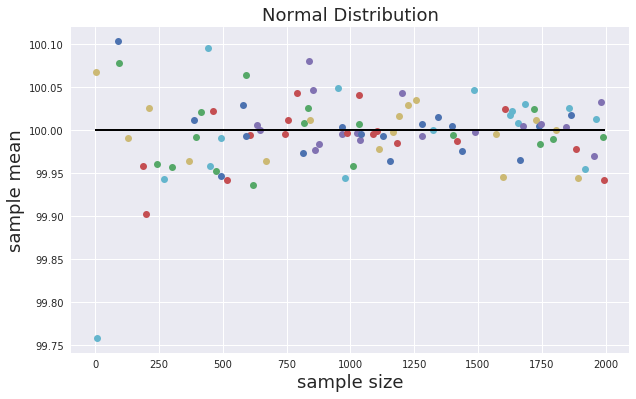

In [12]:
dist='gaus'

md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.normal(df, size = n)
    
md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0.5,1,'Normal Sample Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


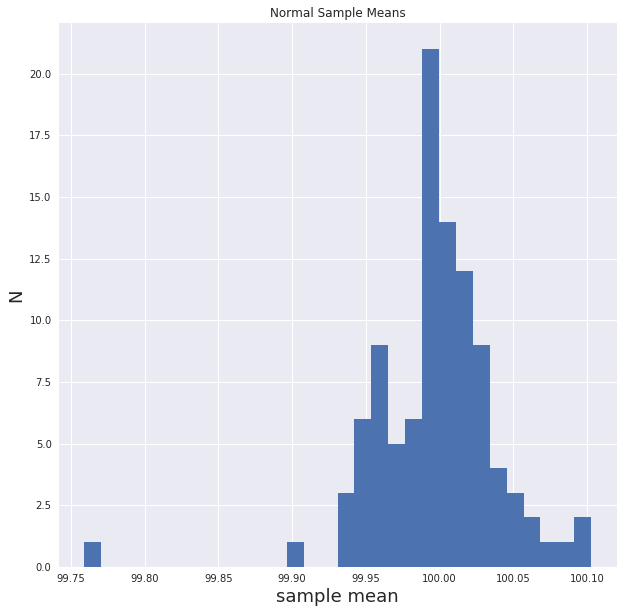

In [13]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Normal Sample Means')

## Figure 4: The histogram of 100 Gaussian Distribution Sample Means

# Do it for the Poisson distribution

In [ ]:
# np.random.poisson?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


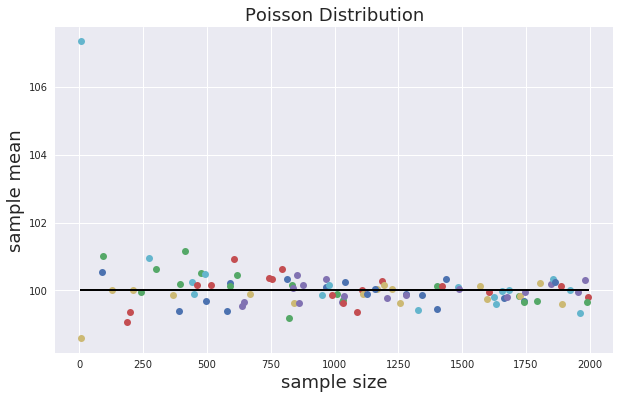

In [14]:
dist='pois'

md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.poisson(df, size = n)
    
md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0.5,1,'Poisson Sample Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


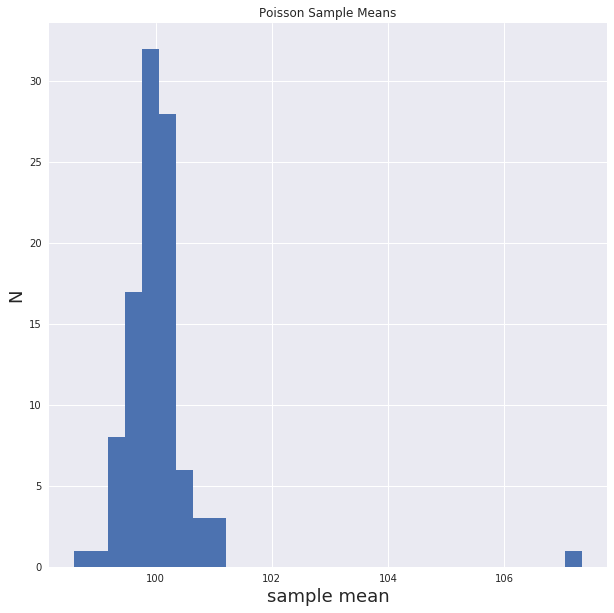

In [15]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Poisson Sample Means')

## Figure 3: The histogram of 100 Poisson Distribution Sample Means

# Do it for the Binomial distribution

In [ ]:
# np.random.binomial?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


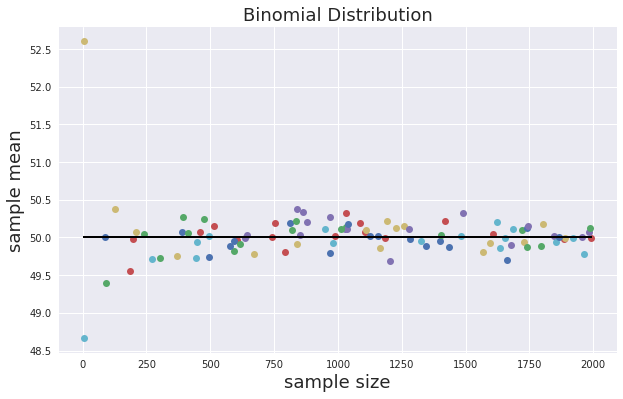

In [16]:
dist='binomial'

md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.binomial(df, 0.5, size = n)
    
md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [50, 50], 'k')

Text(0.5,1,'Binomial Sample Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


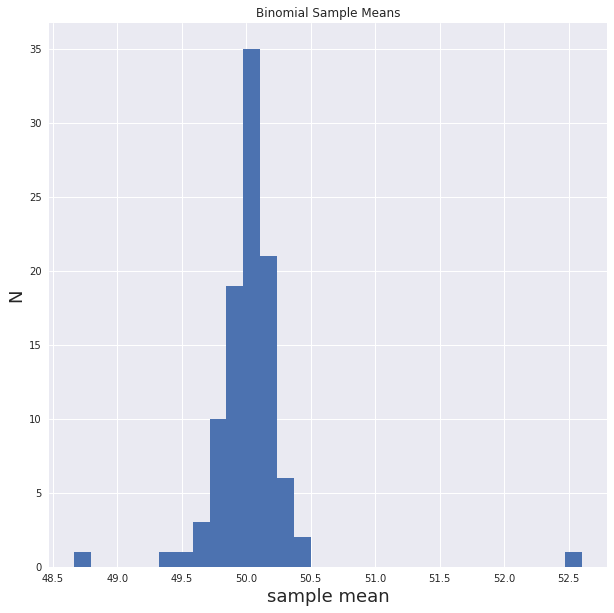

In [17]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Binomial Sample Means')

## Figure 3: The histogram of 100 Binomial Distribution Sample Means

# Do it for another distribution

In [ ]:
# np.random.lognormal?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


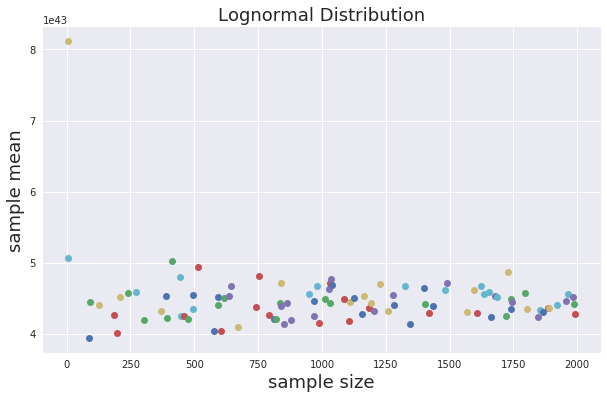

In [19]:
import math
d=math.log(df)
dist='lnormal'

md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.lognormal(df, size = n)
    
md[dist]['means'] = {}
ax_plot = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        ax_plot.plot(nn, md[dist]['means'][nn], 'o')
        ax_plot.set_xlabel('sample size', fontsize=18)
        ax_plot.set_ylabel('sample mean', fontsize=18)
        ax_plot.set_title('Lognormal Distribution', fontsize=18)
#         ax_plot.plot([min(mysize), max(mysize)], [d, d], 'k')

Text(0.5,1,'Lognormal Sample Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


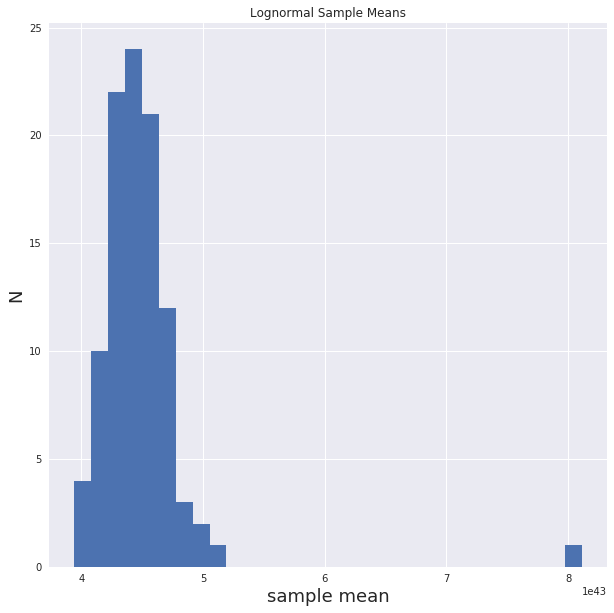

In [20]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Lognormal Sample Means')

## Figure 3: The histogram of 100 LogNormal Distribution Sample Means

## Plotting the distribution of all sample means

In [21]:
# df_all = list(md[x]['means'].values() for x in md)
l_all=[]
[l_all.extend(list(md[x]['means'].values())) for x in md]
len(l_all)

500

In [51]:
l_all=[]
for i in md:
    print(i)
    l_all+=(list(md[i]['means'].values()))
#     break
l_all
    

chisq
pois
binomial
lnormal
gaus


[99.738567142451117,
 99.547490277607707,
 99.450697982207714,
 99.923660566105866,
 95.289237799697133,
 98.11812475488631,
 99.6288578882655,
 99.689241314211941,
 101.07847744638387,
 99.713379070444688,
 99.976743377958087,
 100.54947068302151,
 100.0921235877656,
 101.06108878274499,
 100.22642514993623,
 100.68632350643959,
 99.571244223036416,
 99.802592248105938,
 99.638633662098854,
 99.627862644094833,
 100.75545176250957,
 99.709661384757709,
 99.675259290354873,
 99.572390602104875,
 100.44210257528896,
 99.53281904337841,
 100.37068188367735,
 99.949851808591845,
 99.776215722630624,
 100.06572283880142,
 100.11469079048838,
 101.14733530600999,
 99.050413501985958,
 99.789415154275474,
 99.900869316320083,
 100.09408429024927,
 101.7137706410072,
 97.39033408745739,
 99.938541588144901,
 100.2153159169346,
 99.76929431816113,
 98.896610698203929,
 99.495190431679504,
 99.799878082611016,
 99.6882574779073,
 101.82657895841722,
 99.639096569160358,
 99.718538333765707,
 99

In [52]:
len(l_all)

500

(array([ 400.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    4.,   28.,   47.,   16.,
           4.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.]),
 array([  4.86666667e+01,   2.70379026e+42,   5.40758052e+42,
          8.11137078e+42,   1.08151610e+43,   1.35189513e+43,
          1.62227416e+43,   1.89265318e+43,   2.16303221e+43,
          2.43341123e+43,   2.70379026e+43,   2.97416928e+43,
          3.24454831e+43,   3.51492734e+43,   3.78530636e+43,
          4.05568539e+43,   4.32606441e+43,   4.59644344e+43,
          4.86682247e+43,   5.13720149e+43,   5.40758052e+43,
          5.67795954e+43,   5.94833857e+43,   6.21871760e+43,
          6.48909662e+43,   6.75947565e+43,   7.02985467e+43,
          7.30023370e+43,   7.57061272e+43,   7.84099175e+43,
          8.11137078e+43]),
 <a list of 30 Patch objects>)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


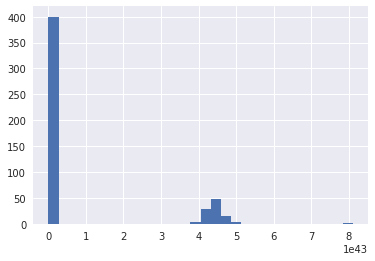

In [54]:
mean=np.array(l_all).mean()
std=np.array(l_all).std()
pl.hist(l_all,bins=30)